In [1]:
# 파일 읽으려면 pandas 패키지 필요
import os
import pandas as pd

data = pd.read_csv('loan_data.csv')
data

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0.60,80,400,0,120,0,M,D,D,1
43382,50,0,0,0,0,1,0,3400,0,0,...,1.61,70,0,0,70,0,F,D,D,1
43383,45,42,42,0,42,0,0,6300,0,0,...,0.95,70,0,0,70,0,M,D,D,1
43384,35,0,0,0,0,1,0,4000,0,0,...,0.51,80,400,0,190,0,F,D,D,1


In [2]:
# 카테고리 데이터 전처리
# 1. 일단 카테고리 데이터와 일반 숫자 데이터 분리
data_category = data.loc[:, ['SEX', 'PAY_METHOD', 'JOB']] # 이건 카테고리 데이터
data_category #출력해보자




,SEX,PAY_METHOD,JOB
0,M,A,A
1,M,C,B
2,M,C,B
3,M,B,C
4,F,B,B
...,...,...,...
43381,M,D,D
43382,F,D,D
43383,M,D,D
43384,F,D,D


In [3]:
# get_dummies를 사용해서 범주형(카테고리) 필드 전처리 하기
data_dummy = pd.get_dummies(data_category, columns=['SEX', 'PAY_METHOD', 'JOB'])
data_dummy


,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,False,True,True,False,False,False,True,False,False,False
1,False,True,False,False,True,False,False,True,False,False
2,False,True,False,False,True,False,False,True,False,False
3,False,True,False,True,False,False,False,False,True,False
4,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
43381,False,True,False,False,False,True,False,False,False,True
43382,True,False,False,False,False,True,False,False,False,True
43383,False,True,False,False,False,True,False,False,False,True
43384,True,False,False,False,False,True,False,False,False,True


In [4]:
data_numeric = data.drop(columns=['SEX', 'PAY_METHOD', 'JOB'])
data_numeric = pd.concat([data_numeric, data_dummy], axis = 1)
data_numeric

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,...,False,True,True,False,False,False,True,False,False,False
1,35,9,9,0,0,1,0,3700,0,9,...,False,True,False,False,True,False,False,True,False,False
2,55,9,9,0,0,0,0,6400,0,1,...,False,True,False,False,True,False,False,True,False,False
3,55,42,0,42,0,5,0,8900,0,13,...,False,True,False,True,False,False,False,False,True,False
4,40,36,36,36,0,3,1,0,0,2,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,False,True,False,False,False,True,False,False,False,True
43382,50,0,0,0,0,1,0,3400,0,0,...,True,False,False,False,False,True,False,False,False,True
43383,45,42,42,0,42,0,0,6300,0,0,...,False,True,False,False,False,True,False,False,False,True
43384,35,0,0,0,0,1,0,4000,0,0,...,True,False,False,False,False,True,False,False,False,True


<Axes: >

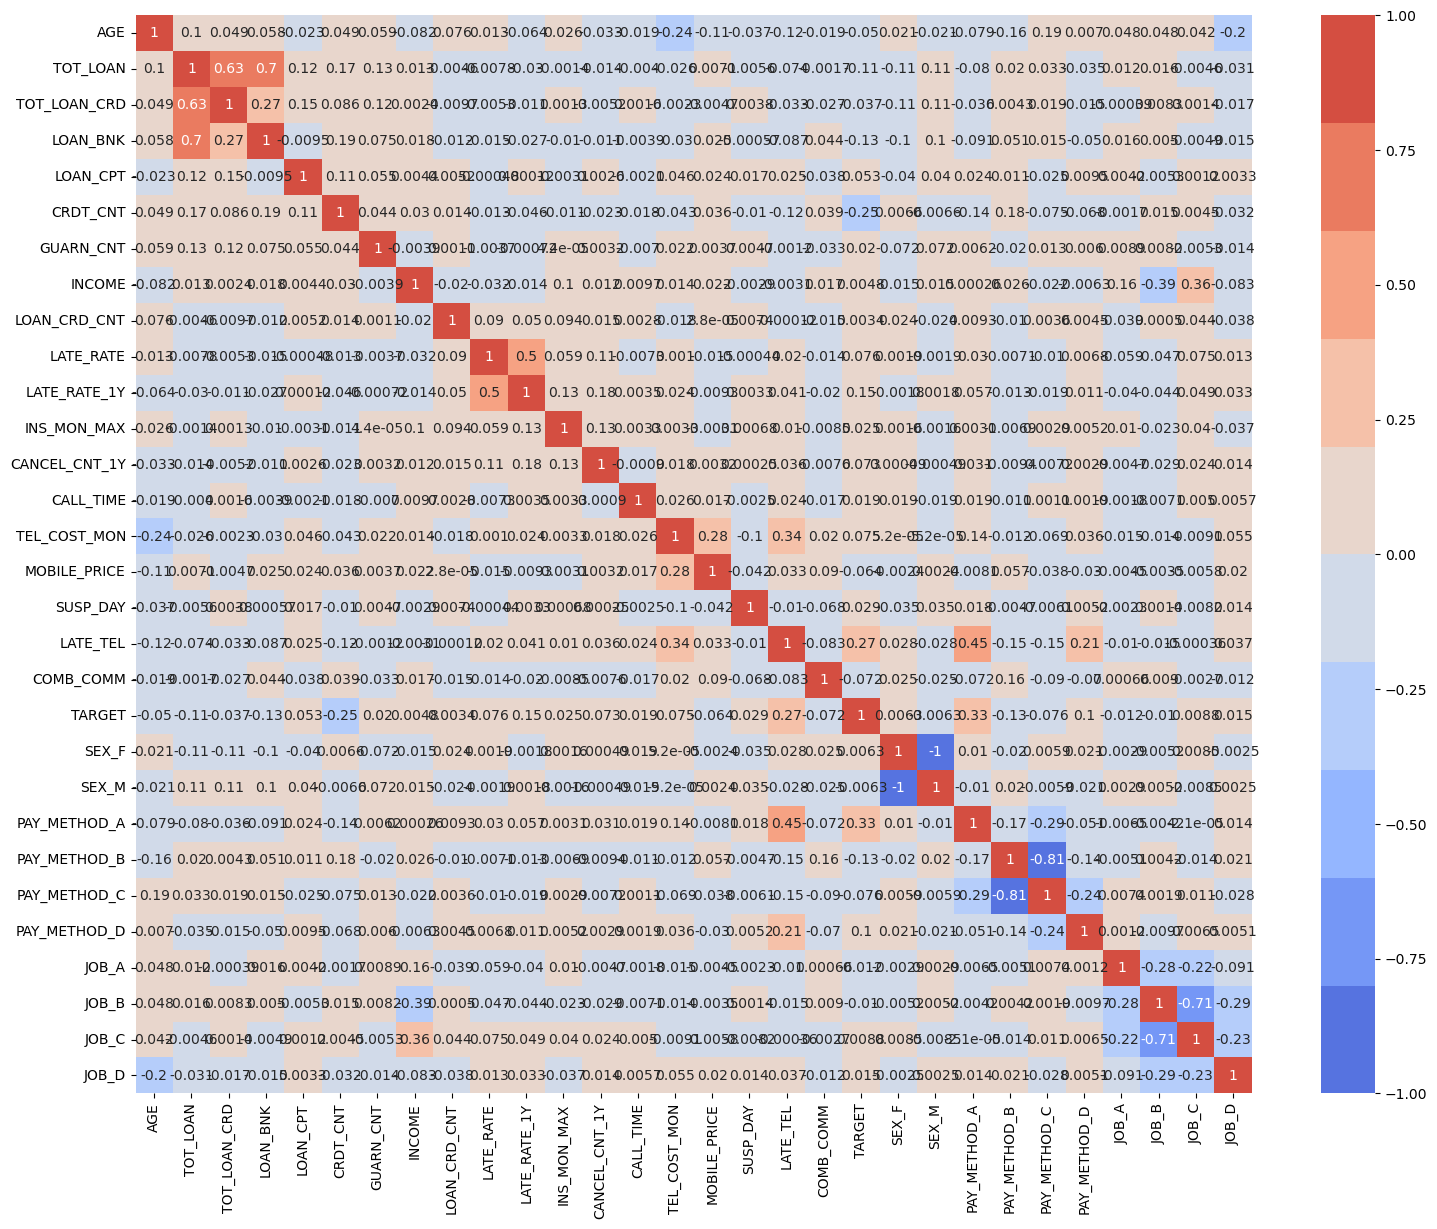

In [5]:
# 쿨 웝 차트 그려보기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 14)) # 상관계수 -1, 1에 가까울수록 상관관계가 높음, 0에 가까울수록 관계없음
sns.heatmap(data_numeric.corr(), cmap=sns.color_palette("coolwarm", 10), annot=data_numeric.corr())

In [6]:
# 데이터 합치기
data_numeric = data.drop(columns=['SEX', 'PAY_METHOD', 'JOB'])
data_numeric = pd.concat([data_numeric, data_dummy], axis = 1)
data_numeric

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,...,False,True,True,False,False,False,True,False,False,False
1,35,9,9,0,0,1,0,3700,0,9,...,False,True,False,False,True,False,False,True,False,False
2,55,9,9,0,0,0,0,6400,0,1,...,False,True,False,False,True,False,False,True,False,False
3,55,42,0,42,0,5,0,8900,0,13,...,False,True,False,True,False,False,False,False,True,False
4,40,36,36,36,0,3,1,0,0,2,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,False,True,False,False,False,True,False,False,False,True
43382,50,0,0,0,0,1,0,3400,0,0,...,True,False,False,False,False,True,False,False,False,True
43383,45,42,42,0,42,0,0,6300,0,0,...,False,True,False,False,False,True,False,False,False,True
43384,35,0,0,0,0,1,0,4000,0,0,...,True,False,False,False,False,True,False,False,False,True


In [7]:
# X값과 Y값 분리 Y값 = TARGET값 = 예측값 = 결과값
X = data_numeric.drop('TARGET', axis=1)
X

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,...,False,True,True,False,False,False,True,False,False,False
1,35,9,9,0,0,1,0,3700,0,9,...,False,True,False,False,True,False,False,True,False,False
2,55,9,9,0,0,0,0,6400,0,1,...,False,True,False,False,True,False,False,True,False,False
3,55,42,0,42,0,5,0,8900,0,13,...,False,True,False,True,False,False,False,False,True,False
4,40,36,36,36,0,3,1,0,0,2,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,False,True,False,False,False,True,False,False,False,True
43382,50,0,0,0,0,1,0,3400,0,0,...,True,False,False,False,False,True,False,False,False,True
43383,45,42,42,0,42,0,0,6300,0,0,...,False,True,False,False,False,True,False,False,False,True
43384,35,0,0,0,0,1,0,4000,0,0,...,True,False,False,False,False,True,False,False,False,True


In [8]:
# 예측하고자 하는 TARGET값. 여기서는 연체를 하느냐 마느냐
y = data_numeric['TARGET'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [9]:
# 학습용 데이터셋과 테스트용 데이터셋을 나누기 학습 : 테스트 를 8 : 2로 나눈다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=2019,
                                                    stratify=y)

In [10]:
#한번씩 출력해보자 학습 데이터 X
X_train

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
42413,55,69,0,0,0,0,0,5600,3,1,...,True,False,False,False,True,False,False,False,True,False
24182,55,3,3,0,0,1,0,5500,0,1,...,True,False,False,False,True,False,True,False,False,False
22091,40,12,3,3,6,2,1,4000,0,0,...,False,True,False,True,False,False,False,False,True,False
27719,60,3,3,0,3,1,0,0,0,4,...,False,True,False,False,True,False,False,False,True,False
20657,50,6,6,6,0,3,0,4200,0,0,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,55,27,21,6,0,3,0,7900,0,2,...,False,True,False,False,True,False,False,True,False,False
18315,60,39,39,0,0,0,0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
24565,40,6,3,3,3,2,0,3700,1,6,...,True,False,False,False,True,False,False,False,True,False
42129,40,21,21,0,21,4,0,3600,0,15,...,True,False,False,False,True,False,False,False,True,False


In [11]:
#한번씩 출력해보자 테스트 데이터 X
X_test

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
4598,40,165,3,0,3,4,0,10000,0,0,...,False,True,False,True,False,False,False,True,False,False
9145,40,0,0,0,0,3,0,2800,0,3,...,True,False,False,True,False,False,False,False,True,False
1070,50,794,794,375,30,2,0,5800,0,2,...,False,True,False,False,True,False,False,False,True,False
22918,30,252,102,102,0,3,0,3800,0,0,...,False,True,False,True,False,False,True,False,False,False
18224,60,21,21,0,0,5,0,4200,0,13,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6620,50,402,6,399,0,6,0,5600,0,1,...,True,False,False,True,False,False,False,True,False,False
20994,55,21,21,21,0,2,0,3500,0,14,...,True,False,False,False,True,False,False,False,True,False
15613,50,12,12,12,0,2,0,0,0,33,...,True,False,False,False,True,False,False,True,False,False
21240,35,90,0,90,0,2,0,0,0,0,...,False,True,False,False,True,False,False,False,False,True


In [12]:
#한번씩 출력해보자 학습 데이터 y
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [13]:
#한번씩 출력해보자 테스트 데이터 y
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 의사결정나무 모델 만들기


In [14]:
# 의사결정나무 모델 만들기 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# 이 한줄로 모델 만들기 끝. 
df = DecisionTreeClassifier(criterion='gini', max_depth=None)
# 학습하기 fit!
df.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
from sklearn.metrics import accuracy_score, f1_score
y_train_pred = df.predict(X_train)
y_test_pred = df.predict(X_test)

# Show train & validation accuracies
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
# Show train & validation f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Train)      : 1.0
- Accuracy (test) : 0.8912
- F1 score (Train)      : 1.0
- F1 score (test) : 0.4194


In [16]:
# X_train 데이터를 가지고 y값을 예측하면?
df.predict(X_train)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [17]:
# X_test 데이터를 가지고 y값을 예측하면? 
df.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
# 트리 그려보기
#from graphviz import Source
#from IPython.display import Image
#from sklearn.tree import export_graphviz

#graph = Source(export_graphviz(df,
#                               out_file=None,
#                               feature_names=X.columns,
#                               filled=True,
#                               leaves_parallel=True))
#png_bytes = graph.pipe(format='png')
#Image(png_bytes)

# 랜덤포레스트 모델 만들기

In [20]:
# 랜덤포레스트 모델 만들기
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', max_depth=None)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Show train & validation accuracies
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
# Show train & validation f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Train)      : 1.0
- Accuracy (test) : 0.9239
- F1 score (Train)      : 1.0
- F1 score (test) : 0.4291


# 상관도 높은거만 해보자

In [22]:
data_corr = data_numeric[['CRDT_CNT', 'LATE_TEL', 'PAY_METHOD_A']]
X = data_corr

In [23]:
# 학습용 데이터셋과 테스트용 데이터셋을 나누기 학습 : 테스트 를 8 : 2로 나눈다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=2019,
                                                    stratify=y)

In [24]:
# 랜덤포레스트 모델 만들기
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', max_depth=None)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Show train & validation accuracies
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
# Show train & validation f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Train)      : 0.9154
- Accuracy (test) : 0.9116
- F1 score (Train)      : 0.3323
- F1 score (test) : 0.2892


# 가라데이터 넣어보기


In [29]:
X_input1 = [[100, 10, 1],]  # 신용카드 100개 발급. 핸드폰요금 연체 10, 핸드폰요금 지불 A ==> 0 예측
X_input2 = [[0, 10, 1],]  # 신용카드 0개 발급. 핸드폰요금 연체 10, 핸드폰요금 지불 A ==> 1 예측

rf.predict(X_input2)

C:\Users\holyb\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)